<a href="https://colab.research.google.com/github/jen-yunjimin/Data_Analyze_Practice/blob/master/%EC%98%81%ED%99%94_%EC%9E%A5%EB%A5%B4%EB%B3%84_%EC%A0%9C%EC%9E%91%EC%95%A1_%ED%8F%89%EA%B7%A0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
%config InlineBackend.figure_format = 'retina'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
FILE_PATH = "/content/drive/MyDrive/MultiCampus/멀티캠퍼스 데이터파일모음/movies.csv"

In [5]:
movie = pd.read_csv(FILE_PATH)
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
movie.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
cols=["genre", "gross"]
df = movie[cols]
df

,genre,gross
0,Drama,46998772.0
1,Adventure,58853106.0
2,Action,538375067.0
3,Comedy,83453539.0
4,Comedy,39846344.0
...,...,...
7663,Drama,NaN
7664,Comedy,NaN
7665,Drama,NaN
7666,Drama,NaN


In [9]:
# nan값 지우기
NEW_movie = df.dropna()
NEW_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7479 entries, 0 to 7659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genre   7479 non-null   object 
 1   gross   7479 non-null   float64
dtypes: float64(1), object(1)
memory usage: 175.3+ KB


In [10]:
NEW_movie.groupby('genre')["gross"].mean().to_frame().reset_index()

,genre,gross
0,Action,1.455086e+08
1,Adventure,1.093252e+08
2,Animation,2.392300e+08
3,Biography,4.787432e+07
4,Comedy,4.433187e+07
5,Crime,3.940120e+07
6,Drama,3.893096e+07
7,Family,1.961725e+08
8,Fantasy,3.870933e+07
9,Horror,4.737241e+07


In [11]:
NEW_movie_sorted = NEW_movie.sort_values(by='gross', ascending=False)
NEW_movie_sorted

,genre,gross
5445,Action,2.847246e+09
7445,Action,2.797501e+09
3045,Drama,2.201647e+09
6663,Action,2.069522e+09
7244,Action,2.048360e+09
...,...,...
3818,Comedy,1.400000e+03
7625,Comedy,7.900000e+02
7580,Crime,6.820000e+02
2417,Drama,5.960000e+02


In [12]:
NEW_movie_drop_sorted = NEW_movie_sorted.drop_duplicates('genre', keep="first")
NEW_movie_drop_sorted

,genre,gross
5445,Action,2.847246e+09
3045,Drama,2.201647e+09
7480,Animation,1.670728e+09
5845,Adventure,1.342322e+09
7072,Family,1.264435e+09
7450,Crime,1.074427e+09
7246,Biography,9.119026e+08
4858,Mystery,7.600069e+08
7046,Horror,7.017964e+08
5251,Comedy,6.112578e+08


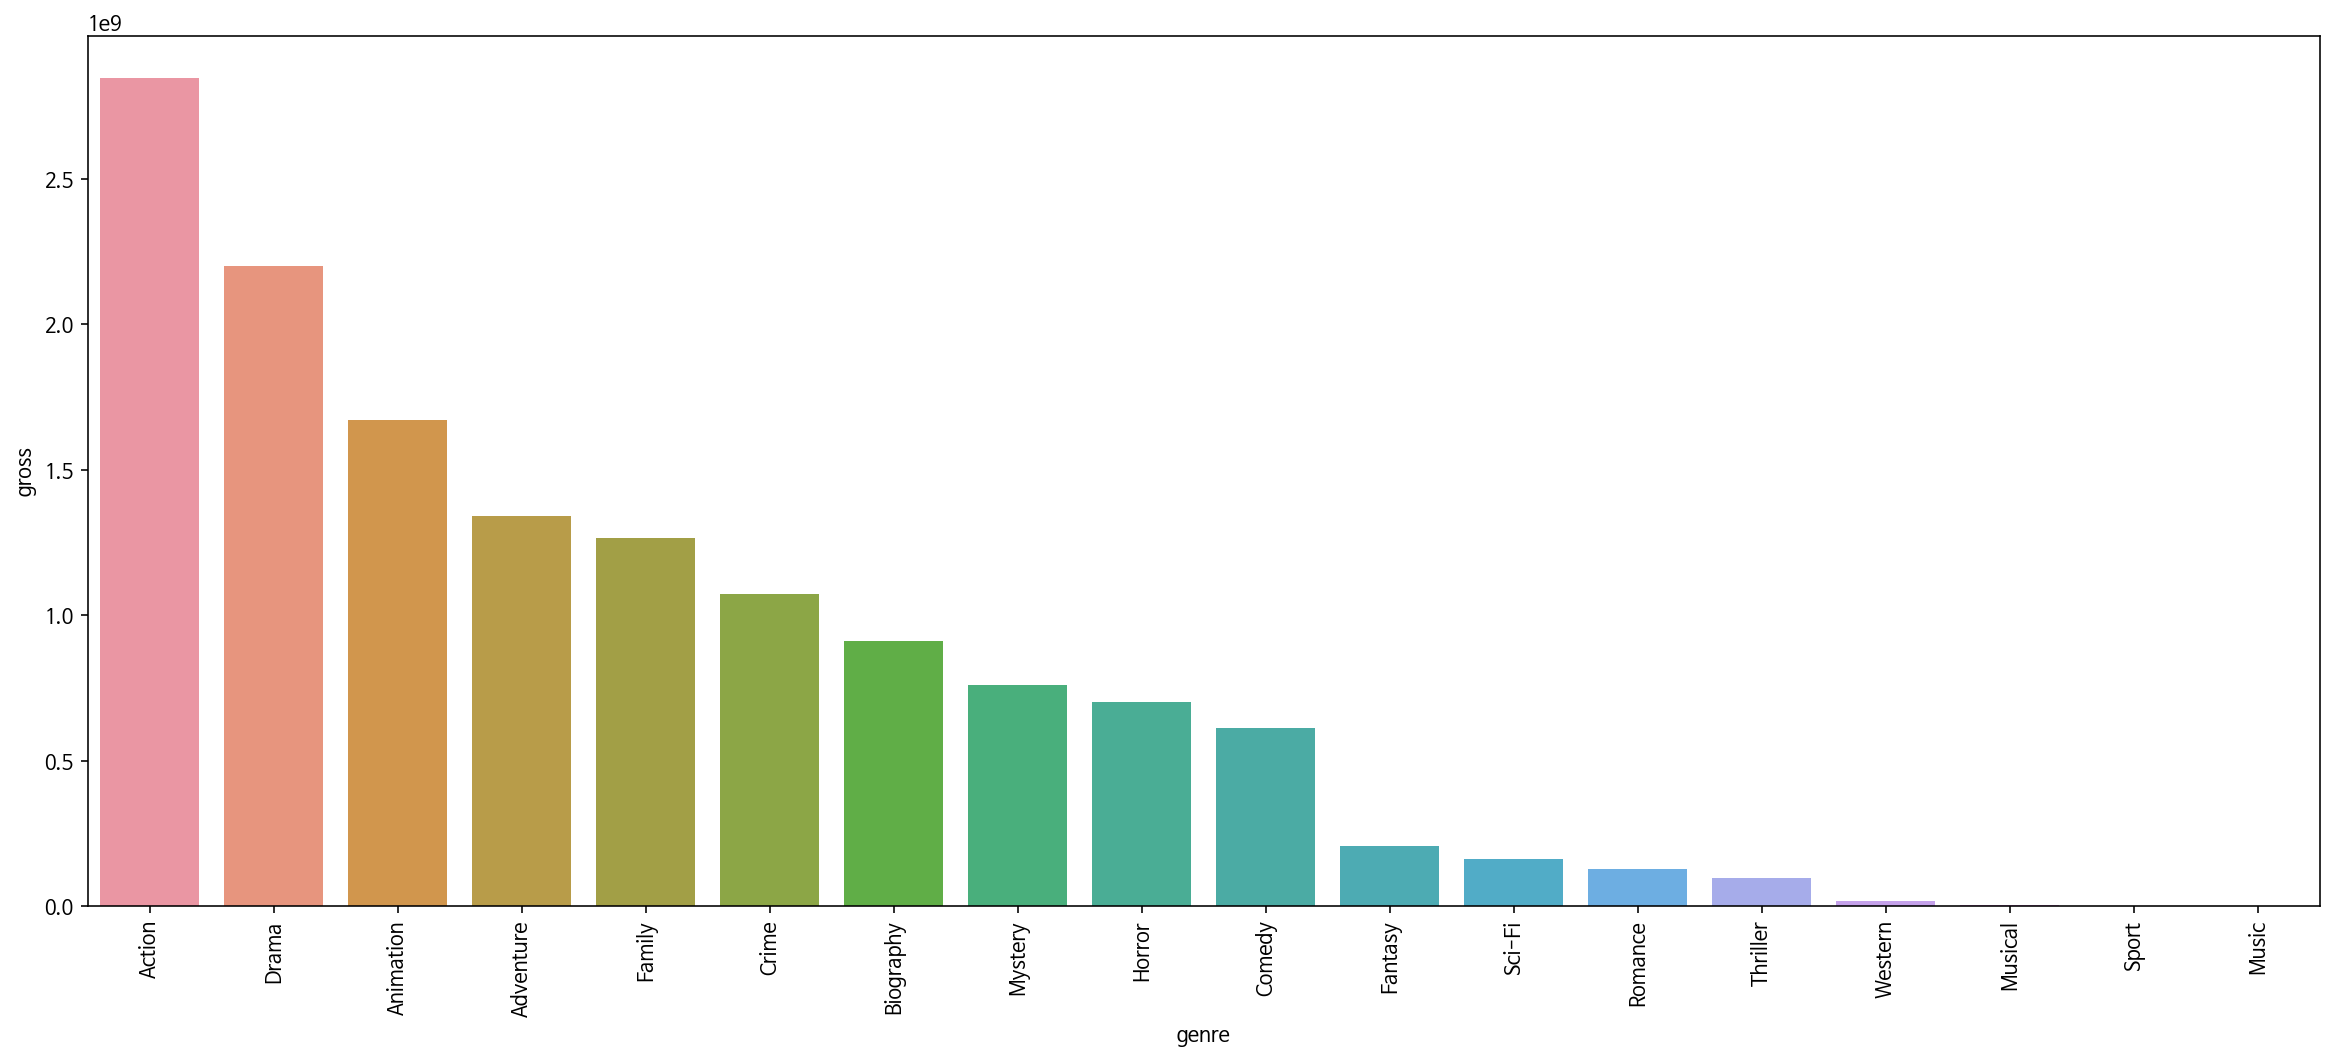

In [17]:
plt.figure(figsize=(20,8))

sns.barplot(x='genre', y="gross", data=NEW_movie_drop_sorted)
plt.xticks(rotation=90)
plt.show()